##Project : California housing price predictor (Regression)

*The 8 input features are the following:*

**MedInc:** median income in block group

**HouseAge:** median house age in block group

**AveRooms:** average number of rooms per household

**AveBedrms:** average number of bedrooms per household

**Population:** block group population

**AveOccup:** average number of household members

**Latitude:** block group latitude

**Longitude:** block group longitude

*The target variable is a scalar: the median house value for California districts, in dollars.*


Let's load, split and scale the California housing dataset:

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [34]:
len(X_train_full)

15480

In [35]:
len(X_test)

5160

In [36]:
len(X_valid)

3870

In [37]:
len(X_train)

11610

In [40]:
# Convert X_train into a DataFrame with attribute names
df_train = pd.DataFrame(X_train, columns=housing.feature_names)

# Print the DataFrame
print(df_train.head())  # Print the first few rows of the DataFrame


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.5214      15.0  3.049945   1.106548      1447.0  1.605993     37.63   
1  5.3275       5.0  6.490060   0.991054      3464.0  3.443340     33.69   
2  3.1000      29.0  7.542373   1.591525      1328.0  2.250847     38.44   
3  7.1736      12.0  6.289003   0.997442      1054.0  2.695652     33.55   
4  2.0549      13.0  5.312457   1.085092      3297.0  2.244384     33.93   

   Longitude  
0    -122.43  
1    -117.39  
2    -122.98  
3    -117.70  
4    -116.93  


Let us standardize the data

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
len(X_train)

11610

In [27]:
len(X_valid)

3870

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

Let us now define the model architecture

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3995 - val_loss: 1.9867
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6861 - val_loss: 0.6335
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6031 - val_loss: 0.5723
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5756 - val_loss: 0.5269
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5526 - val_loss: 0.5069
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5315 - val_loss: 0.4916
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5138 - val_loss: 0.4820
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4988 - val_loss: 0.4607
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4851 - val_loss: 0.4473
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4741 - val_loss: 0.4447

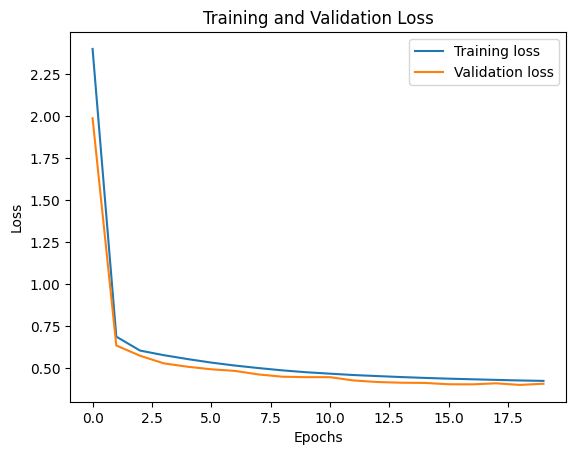

In [50]:
# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Let us evaluate the model testing performance

In [51]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4192


In [31]:

# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 [==============================] - 0s 61ms/step
Sample 1:
Predicted: 0.7479265332221985
Actual: 0.477
Sample 2:
Predicted: 1.6871938705444336
Actual: 0.458
Sample 3:
Predicted: 3.6486470699310303
Actual: 5.00001
